In [10]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [5]:
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float

In [9]:
def calc_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight / (height ** 2)

    state['bmi'] = round(bmi, 2)

    return state

In [12]:
graph = StateGraph(BMIState)

# add nodes
graph.add_node("calc_bmi", calc_bmi)

# add edges
graph.add_edge(START, "calc_bmi")
graph.add_edge("calc_bmi", END)

#compile
workflow = graph.compile()

#execute

In [13]:
INITIAL_STATE = {'weight_kg': 75, 'height_m': 1.8}

final = workflow.invoke(INITIAL_STATE)

print(final)

{'weight_kg': 75, 'height_m': 1.8, 'bmi': 23.15}


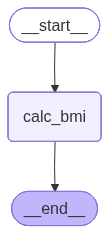

In [15]:
# from IPython.display import Image
# Image(workflow.get_graph().draw_mermaid_png)

workflow